# <center>Модели машинного обучения в production
Важно задать себе следующие вопросы:
* Какими будут основные потребители результатов? Это будут другие сервисы? Или модель будет встроена в мобильное приложение?
* Как и в каком виде потребители ожидают получать результаты? По времени или по запросу? Если по запросу, то по каким правилам они будут его осуществлять?
* Какая для этого существует (или планируется) инфраструктура?

Существует множество методологий для управления Data Science-проектами. Наиболее распространённой методологией разработки является знакомая нам модель *Cross-Industry Standard Process for Data Mining*, или *CRISP-DM*. 

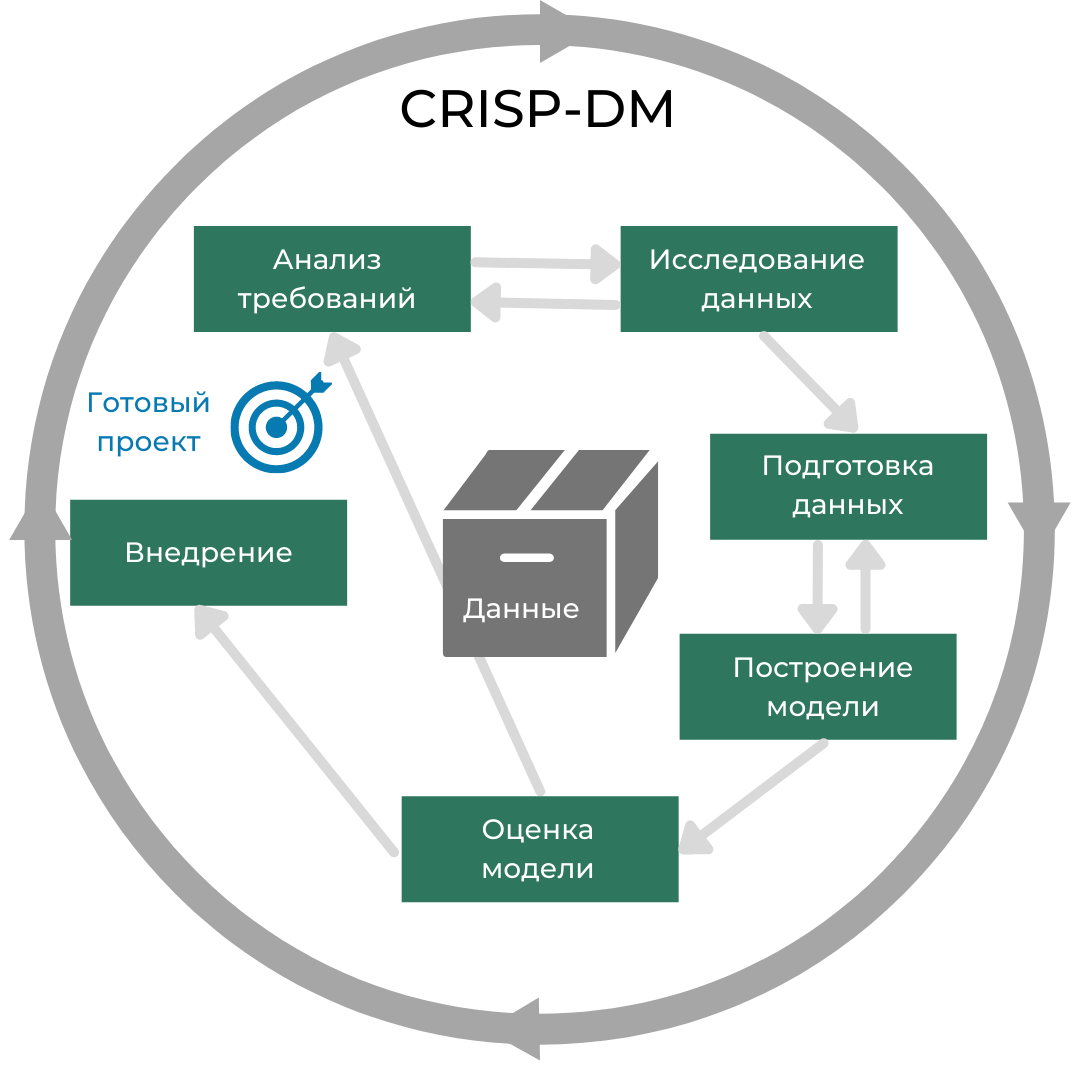

На **этапе внедрения** мы должны понять, будет ли происходить деградация модели во времени в связи с изменением распределений входных данных и возможно ли автоматизировать оценку качества, обновление моделей и их деплой.

# <center>Деплой модели
>Задача развёртывания приложения на сервере называется **деплой** (от англ. *deployment* — внедрение, развёртывание). По сути, это процесс трансформации исходного кода вашего приложения в рабочее состояние на конкретном сервере.

Для того чтобы внедрить модель в продакшн (в минимальном варианте), необходимо:
* Сохранить обученную модель в файл.
* Поднять сервер.
* Доставить и запустить на нём свою модель.

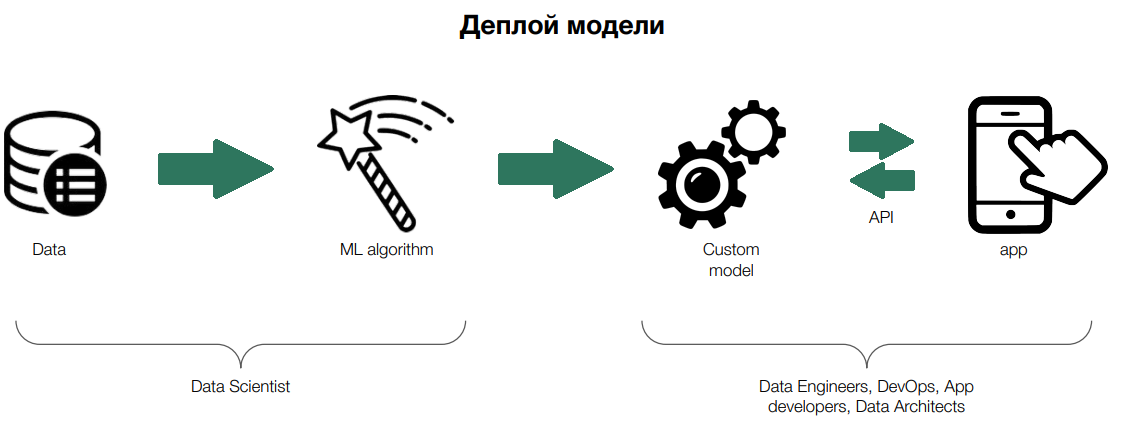

Опыт подсказывает, что если модель создаётся «в вакууме», то в итоге её просто нельзя будет вывести в продакшн.

Дополнительной проблемой является то, что большинство библиотек для машинного обучения сфокусированы именно на **обучении**, а не на **предсказании**.



# <center>Сохранение и загрузка моделей: pickle и joblib
Код, который был написан для обучения модели и оценки её качества, крайне редко используется для инференса (от англ inference — вывод). Так называется непрерывная работа алгоритма машинного обучения в конечном приложении. По этой причине при внедрении моделей в продакшн их принято сохранять в готовом виде, то есть уже обученными и готовыми решать реальные задачи.

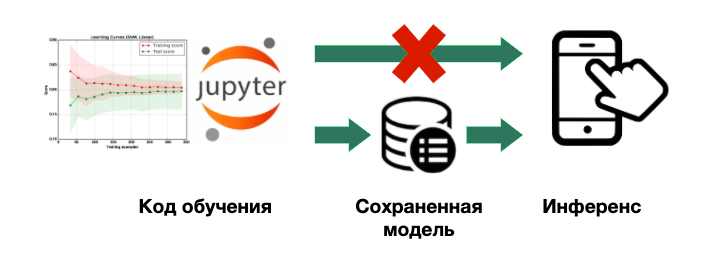

# <center>Сериализация и десериализация
Как и почти всё в языке программирования *Python*, обученная модель является объектом. Этот объект не простой, поскольку модель содержит сложную иерархию классов — в каждом классе есть набор полей, ссылающихся на объекты других классов, и так далее.

Например, объект класса *RandomForestClassifier* из библиотеки *sklearn* содержит множество полей, часть из которых устанавливается во время инициализации модели (максимальная глубина, количество деревьев в ансамбле, критерий информативности и т. д.), а часть определяется во время обучения модели (последовательность предикатов внутри каждого дерева в ансамбле, значимость признаков). Наша задача — «законсервировать» этот объект (модель), сохранив значение всех полей, которые мы задали при инициализации объекта и получили по итогам обучения. То есть мы должны сохранить модель, включая её внешние и внутренние параметры.

Чтобы гарантировать сохранение всей структуры данных и получить её при загрузке обратно, используется сериализация.

>**Сериализация** — это процесс трансформации любой структуры данных, поддерживаемой в языке, в последовательность битов (или байтов). Обратной операцией является **десериализации**.

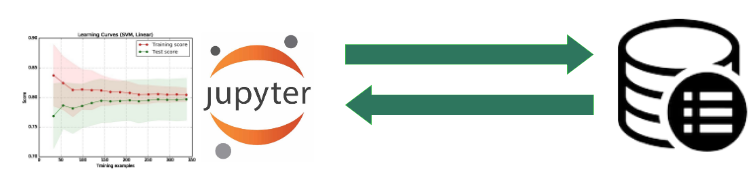

То, в каком виде данные записаны на диск, зачастую может сильно отличаться от того, в каком виде они существуют в памяти программы. И там, и там это будут байты информации, но в файле будет представлена просто их последовательность, а в памяти программы это может быть какой-то объект или даже несколько объектов со структурой.



# <center>Сохранение и загрузка моделей: PMML и ONNX-ML
Среда или требования к инференсу модели для вашего проекта могут быть устроены так, что потребуют реализации на языке программирования, отличном от *Python*. Например, если компания разрабатывает десктопное приложение, то для внедрения модели её потребуется «перевести» на *Java* или *C++*. Как это сделать?

# <center>PREDICTIVE MODEL MARKUP LANGUAGE
В таких случаях используется генерация файла формата *PMML (Predictive Model Markup Language)*.

>**PMML** — это *XML*-диалект, который применяется для описания статистических и *DS*-моделей. *PMML*-совместимые приложения позволяют легко обмениваться моделями данных между собой. Разработка и внедрение *PMML* осуществляется *IT*-консорциумом *Data Mining Group*.

К сожалению, далеко не все библиотеки для машинного обучения (в том числе sklearn) поддерживают возможность сохранения обученной модели в указанном формате. Однако для этого можно использовать сторонние библиотеки, и одной из самых популярных является [Nyoka](https://open-source.softwareag.com/nyoka/).



# <center>OPEN NEURAL NETWORK EXCHANGE
В разработке моделей на основе нейронных сетей сегодня наиболее распространён формат *ONNX (Open Neural Network Exchange)*.

>**ONNX (Open Neural Network Exchange)** — это открытый стандарт для обеспечения совместимости моделей машинного обучения. Он позволяет разработчикам искусственного интеллекта использовать модели с различными инфраструктурами, инструментами, средами исполнения и компиляторами.

Часто стандарт *ONNX* и его библиотеки используют для конвертации из одного фреймворка в другой (например, из *PyTorch* в *TensorFlow* для использования в продакшене). Для конвертации различных фреймворков (не только *DL*) в формат *ONNX* и обратно существует ряд библиотек:
* *ONNX-Tensorflow*;
* *Tensorflow-ONNX*;
* *Keras-ONNX*;
* *Sklearn-ONNX*.
* и другие.

Также в рамках стандарта *ONNX* есть инструмент *ONNX-runtime*. Он служит для ускорения инференса *Python*-моделей, а также инференса на других языках, например *Java*, *C++*.



# <center>Деплой модели. Протоколы сетевого взаимодействия
## <center>МОДЕЛИ СЕТЕВОГО ВЗАИМОДЕЙСТВИЯ
Наиболее известные модели сетевого взаимодействия — OSI и TCP/IP.

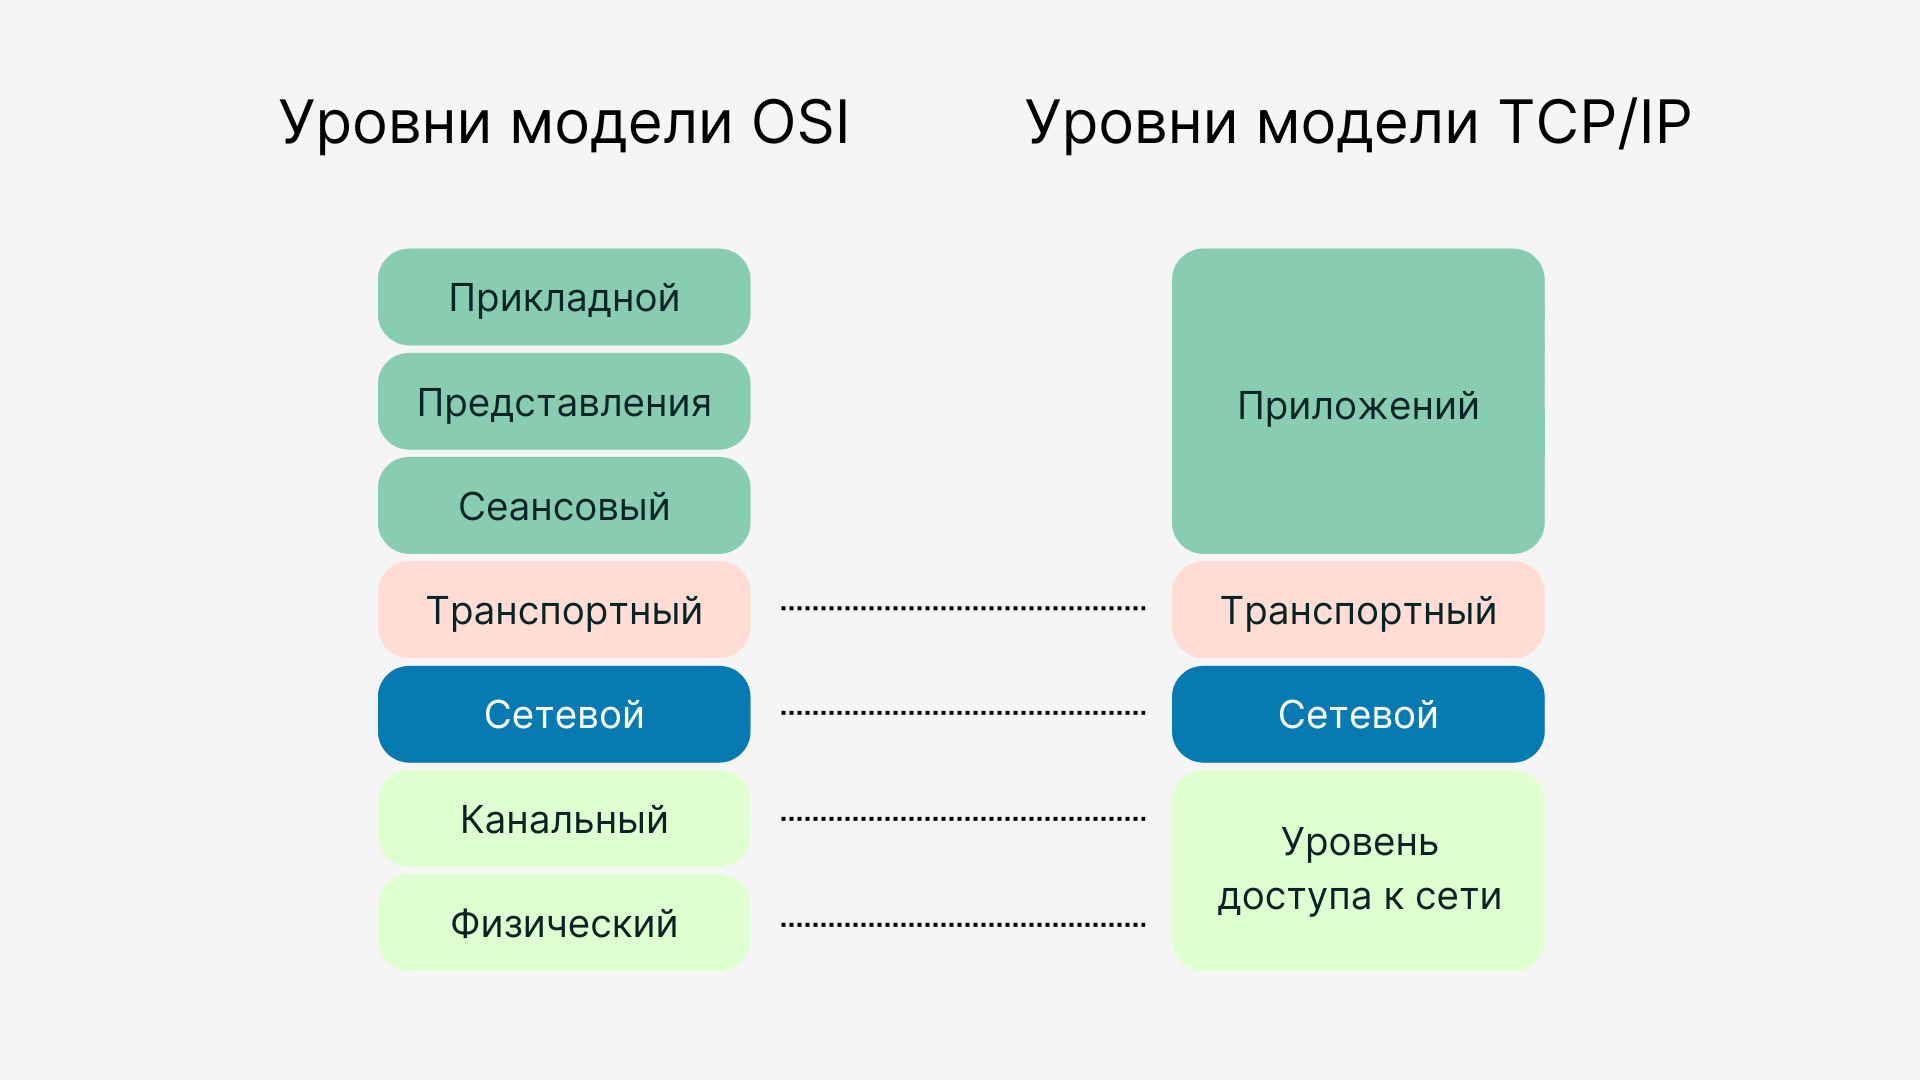

Эти модели распределяют сетевые протоколы по разным уровням взаимодействия. Что такое протокол?

Вообще **протокол** — это некоторый набор правил, определяющий принципы взаимодействия устройств в сети. В нашем случае это правила, по которым программа, получив по сети набор битов, понимает, как его прочитать и что он значит.

Для того чтобы обмен информацией между устройствами проходил успешно, все устройства (участники процесса) должны следовать условиям протокола. В сети поддержка протоколов встраивается или в аппаратную (в «железо»), или в программную часть (в код системы), или в обе этих части. 

На схеме ниже представлены примеры протоколов, а также уровни их распределения в модели *TCP/IP*:

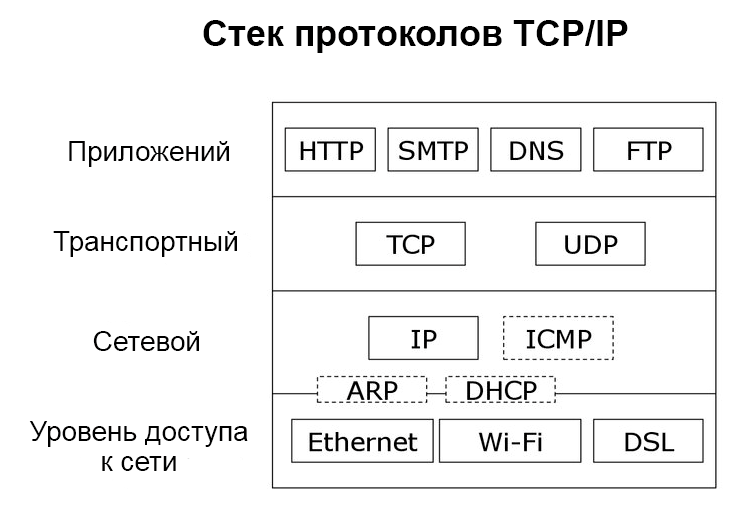

В процессе сетевого взаимодействия участвуют как минимум два устройства — устройство-отправитель и устройство-получатель. Говоря простым языком, каждая из моделей сетевых взаимодействий устанавливает правила и регламенты по отправке сообщений между компьютерами.

Отправленное сообщение проходит все уровни, начиная от прикладного уровня приложений и заканчивая физическим уровнем доступа к сети. Когда сообщение доходит до адресата, оно также проходит все уровни в обратном порядке.

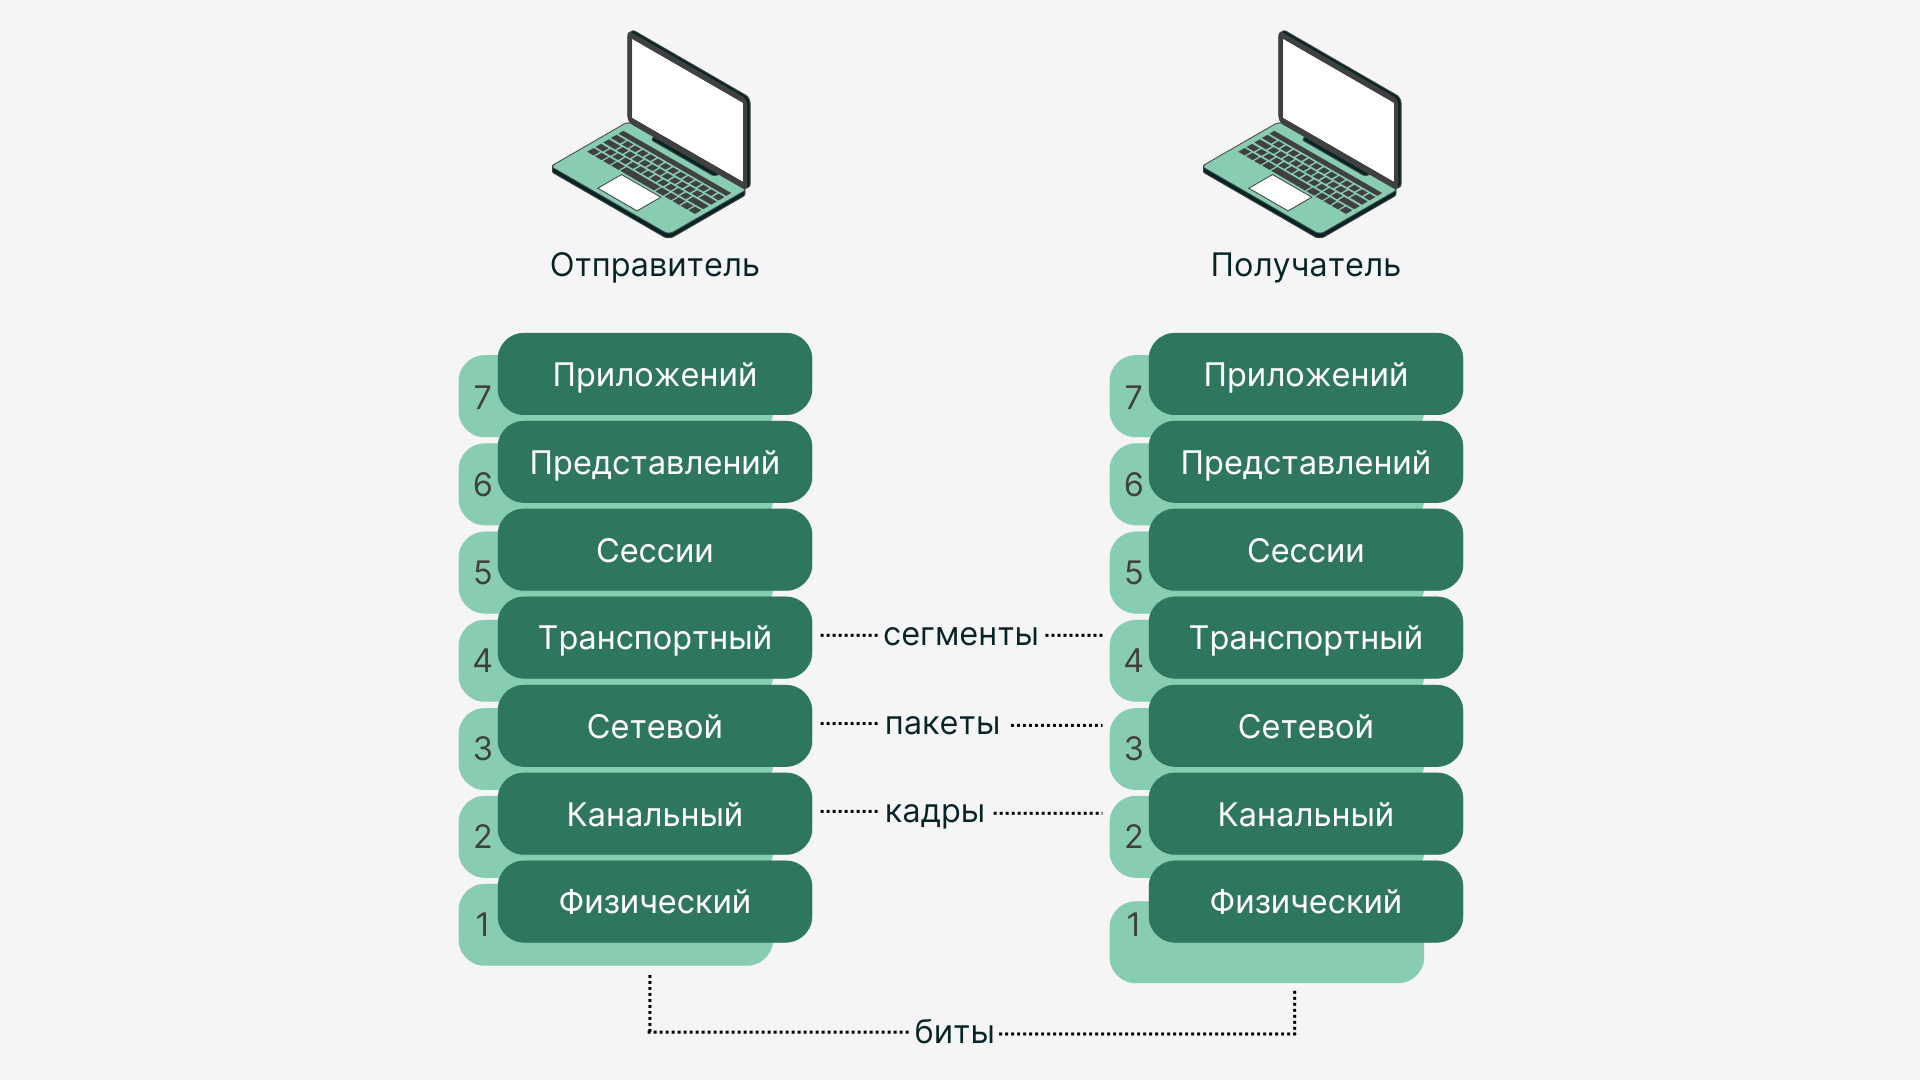

Для наших целей (деплой модели в прод) достаточно уметь работать всего с тремя протоколами:

>**IP** — протокол сетевого уровня. Он определяет путь, по которому передаются данные.

>**TCP** — соответствует транспортному уровню, а значит, определяет, как передаются данные.

>**HTTP** — относится к прикладному уровню, описывающему взаимодействие приложений с сетью.

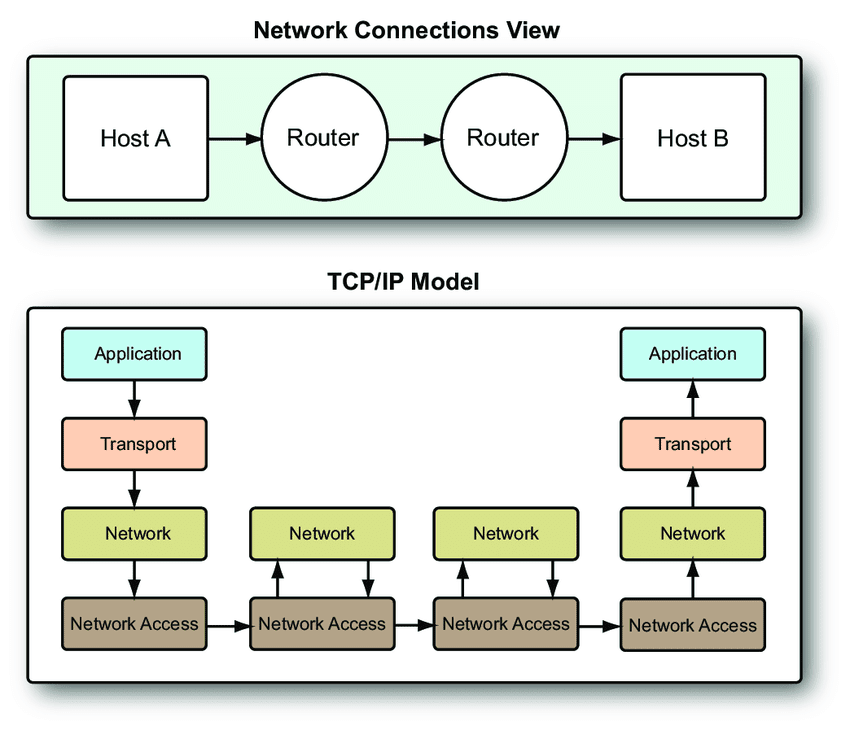

### IP
*IP (Internet Protocol)* — один из главных протоколов сетевого взаимодействия. Он отвечает за маршрутизацию трафика по сети, то есть определяет путь, по которому отправятся данные. Данные передаются пакетами (или **датаграммами**), которые формирует протокол *IP*.

Важным свойством IP является отсутствие гарантированной доставки пакетов и их цельности: пакеты могут прийти в другой очерёдности (не в той, в которой их отправляли), прийти повреждёнными (тогда они уничтожаются) или вообще не прийти.

Путь, по которому отправятся данные, строится на основе *IP*-адресов.

>**IP-адрес** — это уникальный адрес, используемый для связи устройств внутри сети.

*IP*-адрес устроен довольно просто: чаще всего это четыре числа, разделённых точками (такой формат поддерживается в протоколе *IPv4*). Например, вот один из самых популярных IP-адресов — 192.168.0.1.

Каждое из чисел в адресе — это восьмизначное двоичное число, или, правильнее говорить, октет. Оно может принимать значения от 0000 0000 до 1111 1111 в двоичной системе или от 0 до 255 — в десятичной системе счисления, то есть 256 разных значений.

Получается, что диапазон IP-адресов стартует с 0.0.0.0 и заканчивается 255.255.255.255. Если посчитать количество всех адресов в этом диапазоне, получится чуть больше четырёх миллиардов.

Уникальность IP-адреса может быть глобальной (в рамках всего интернета) или локальной (в рамках локальной подсети). Некоторые IP-адреса не являются общедоступными и зарезервированы для специальных целей, например диапазоны IP-адресов:

* 127.0.0.1–127.255.255.255 - используются для связи внутри локальной машины (localhost)
* 172.16.0.1–172.31.255.255 - используются для частных подсетей (недоступных из интернета)
* 198.18.0.1–198.19.255.254 - используются для тестирования производительности

>**localhost** — зарезервированное доменное имя для *IP*-адресов из диапазона 127.0.0.1–127.255.255.255 (в сети из одного компьютера — для 127.0.0.1).

В компьютерной сети localhost относится к компьютеру, на котором запущена программа. Компьютер работает как виртуальный сервер. Тем самым создаётся так называемая «внутренняя петля»: обращаясь по IP-адресу localhost, вы, по сути, заставляете компьютер общаться с самим собой. Это нужно, например, для разработки и тестирования клиент-серверных приложений на одной машине (то есть и клиент, и сервер находятся на одном компьютере), что позволяет при разработке не использовать сетевое оборудование, дополнительные программные модули и тому подобное.



### TCP
**TCP (Transmission Control Protocol)** — протокол транспортного уровня. Он отвечает за управление передачей данных и гарантирует:
* доставку пакетов (посылает пакеты повторно, если они не были доставлены);
* последовательность и целостность доставки пакетов (используя нумерацию и контрольные суммы для проверки);
* устраняет дубликаты в случае необходимости.

Важной особенностью TCP является то, что перед отправкой данных он «устанавливает соединение» с получателем — обменивается управляющей информацией. После отправки пакетов источник ждёт подтверждения от получателя, что пакеты были доставлены.

Обычно на одном **узле сети** (сервере, компьютере) работают несколько приложений/процессов одновременно. Для идентификации приложения на источнике и получателе используется **порт**, который задаётся целым неотрицательным числом. Процесс или приложение могут зарезервировать у ОС определённый порт, например, для передачи данных по сети.

Порты разделяют на системные (0–1023), и пользовательские (1024–49151). Некоторые номера портов определены для конкретных приложений, например:
* 22 — протокол SSH для безопасной передачи данных;
* 25 — протокол SMTP для незащищённой передачи e-mail-сообщений;
* 80 — протокол HTTP.

### HTTP
*HTTP* — это наиболее широко используемый протокол. Все сайты, на которые вы заходите, работают по этому протоколу. Он был разработан именно для передачи содержимого *HTML*-страниц в интернете, но впоследствии стал использоваться и для других целей. Например, *HTTP* применяется для налаживания взаимодействия между сервисами в сложных системах. Этим он нам и интересен.

Итак, HTTP — это протокол, который работает по принципу **клиент-сервер**.

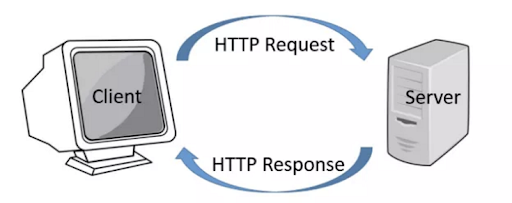

Это означает, что во взаимодействии участвует **две программы**, причём в разных ролях. Одна из них — **клиент**, или «заказчик услуг», формирует запрос и отправляет его к серверу. **Сервер**, или «поставщик услуг», получив запрос, обрабатывает его, формирует ответ и возвращает его клиенту.

#### Структура HTTP-запросов

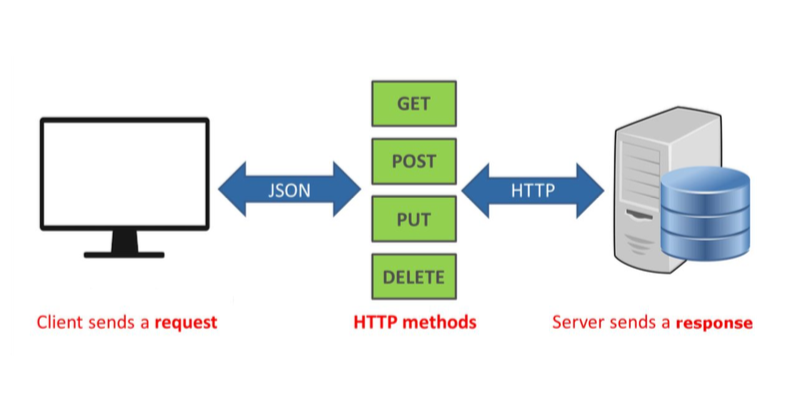

Запрос и ответ в *HTTP* являются строками, составленными в соответствии с протоколом.

**Запрос** состоит из трёх частей.

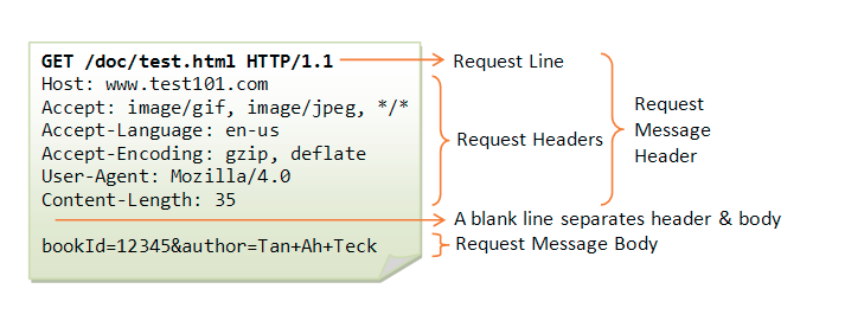

1. **Стартовая строка**, или *Request Line* — по ней определяется вид запроса.

2. **Заголовки запроса**, или *Request Headers* — дополнительные параметры запроса, в которых обычно передаётся служебная информация, например, в каком формате ожидается ответ или информация о клиенте.

3. **Тело запроса**, или *Request Message Body* — содержит данные для передачи. Эта часть присутствует не всегда.

Первое, что указано в стартовой строке — это метод, или тип запроса. Есть набор стандартных методов, но теоретически вы можете создавать и свои.

**Основные методы:**
* **GET** — обычно означает получение содержимого ресурса и не содержит тела.

    Например, когда вы заходите в каталог интернет-магазина, вы получаете страницу с товарами — ваш браузер отправляет GET-запрос на сервер интернет-магазина.

* **POST** — наоборот, передача данных ресурсу.

    Например, когда вы заполняете форму авторизации на любом сайте и нажимаете кнопку для отправки своих данных, вы совершаете POST-запрос на сервер ресурса.

* **PUT** — обновление ресурса.
* **DELETE** — удаление ресурса.

В *HTTP* мы работаем с ресурсами, которые расположены по некоторому адресу на сервере. Изначально под ресурсами понимались *HTML*-файлы на сайте (вёрстка сайта), но сейчас это уже некоторое абстрактное понятие.

Адрес ресурса, или *URI* (Uniform Resource Identifier) — это то, что вы видите в адресной строке браузера. Он следует за методом в стартовой строке запроса.

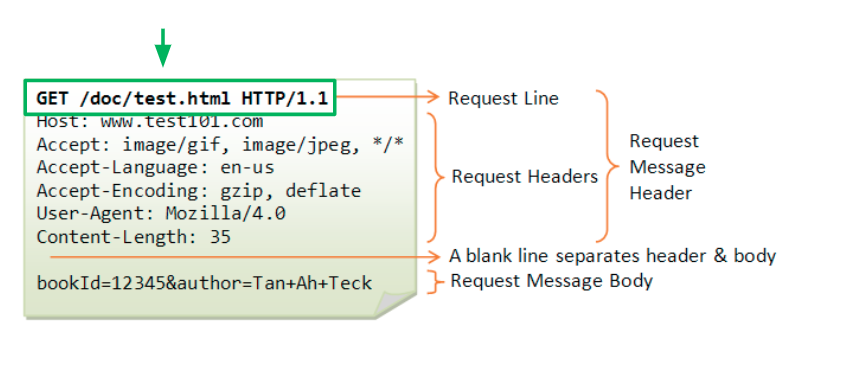

Для начала расшифруем аббревиатуры:
* **URI** — *Uniform Resource Identifier* (унифицированный идентификатор ресурса);
* **URL** — *Uniform Resource Locator* (унифицированный определитель местонахождения ресурса);
* **URN** — *Unifrorm Resource Name* (унифицированное имя ресурса).

Все *URL* являются *URI*. Однако обратное неверно.

Теперь дадим расширенное определение терминам:
* **URI** — имя и адрес ресурса в сети. URI включает в себя URL и URN.

    Пример: *https://wiki.merionet.ru/images/vse-chto-vam-nuzhno-znat-pro-devops/1.png*

* **URL** — адрес ресурса в сети. URL определяет местонахождение и способ обращения к нему. 

    Пример: *https://wiki.merionet.ru*

* **URN** — имя ресурса в сети. URN определяет только название ресурса, но не говорит, как к нему подключиться.

    Пример: *images/vse-chto-vam-nuzhno-znat-pro-devops/1.png*

Последней идёт версия *HTTP*-протокола (кстати, последняя актуальная версия, 1.1, появилась ещё в 1999 году).

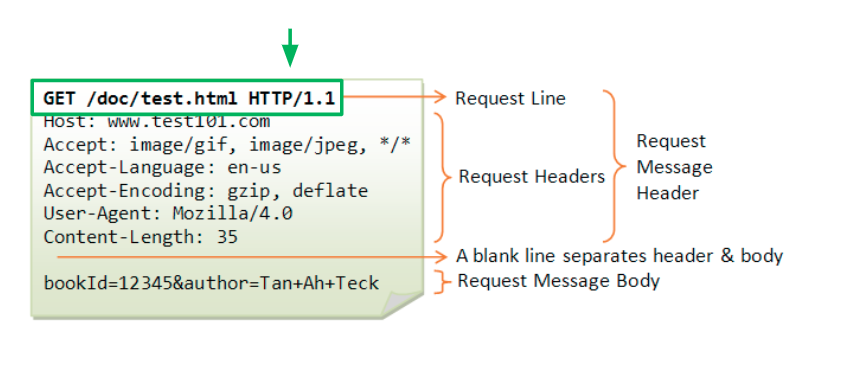

**Ответ** также состоит из стартовой строки, заголовков и тела.

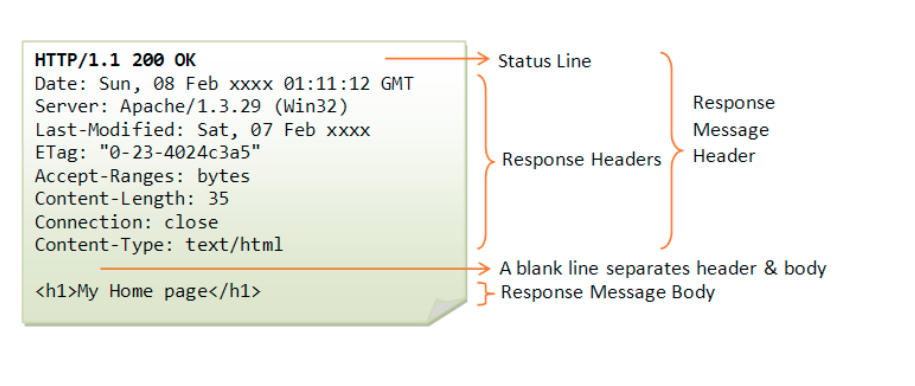

Основное отличие — в стартовой строке: там вместо метода и *URI* указывается код состояния. Это численное значение, которое показывает результат обработки.

Группы кодов состояния ответа HTTP-сервера делятся на следующие группы:
* информационные (100–199);
* успешно (200–299);
* перенаправление (300–399);
* ошибка клиента (400–499);
* ошибка сервера (500–599).


# <center>REST (REPRESENTATIONAL STATE TRANSFER)
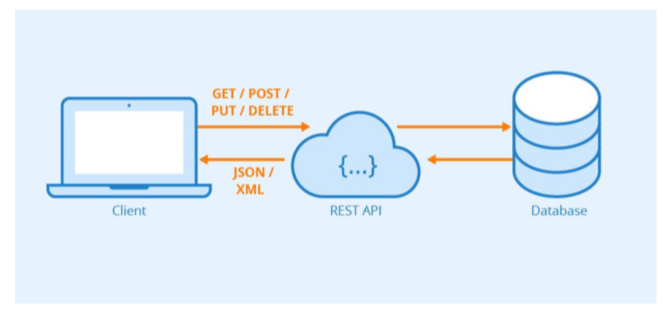

Cпецификация *HTTP* не обязывает сервер понимать все методы, а также не указывает серверу, что он должен делать при получении запроса с тем или иным методом. Поэтому был изобретён архитектурный стиль *REST*.

Он даёт более верхнеуровневые указания, чем *HTTP*-протокол, а именно:
* как правильно организовывать адресацию к ресурсам;
* какие методы у этих ресурсов должны быть;
* какой ожидается результат.

Основная концепция философии *REST* заключается в том, что клиентом *RESTful*-сервера может быть что/кто угодно: браузер, другое приложение, разработчик. Веб-приложение, спроектированное по правилам *REST*, предоставляет информацию о себе в форме информации о своих ресурсах.

Ресурс может быть любым объектом, о котором сервер предоставляет информацию. Например, в API Instagram ресурсом может быть пользователь, фотография, хэштег. Каждая единица информации (ресурс) однозначно определяется URL.
* GET-запрос `/rest/users` — получение информации обо всех пользователях.
* GET-запрос `/rest/users/125` — получение информации о пользователе с `id=125`.
* POST-запрос `/rest/users` — добавление нового пользователя.
* PUT-запрос `/rest/users/125` — изменение информации о пользователе с `id=125`.
* DELETE-запрос `/rest/users/125` — удаление пользователя с `id=125`.

Поскольку спецификация *REST* является общепризнанной и широко распространённой, то следовать ей очень полезно.

Для того чтобы наладить взаимодействие по *HTTP*, на стороне клиента вам необходимо сформировать запрос: указать адрес, куда отправится запрос, выбрать метод, а также задать заголовки и тело запроса, если это нужно для выбранного метода.

На стороне сервера при получении запроса необходимо знать, какой ресурс запрошен, чтобы понять, каким кодом его обрабатывать. Этот код, в зависимости от того, что он должен делать, может проверить значения заголовков и/или прочитать тело запроса.



# <center>Деплой модели. Обзор фреймворков
## <center>FLASK
*Flask* позиционируется как микрофреймворк для написания **легковесных** сервисов, но при этом он достаточно гибкий и кастомизируемый, что позволяет использовать его в проектах любой сложности. Как и все остальные фреймворки, он работает на основе **маршрутизации запросов**, приходящих на сервер, который и должен обработать эти запросы.

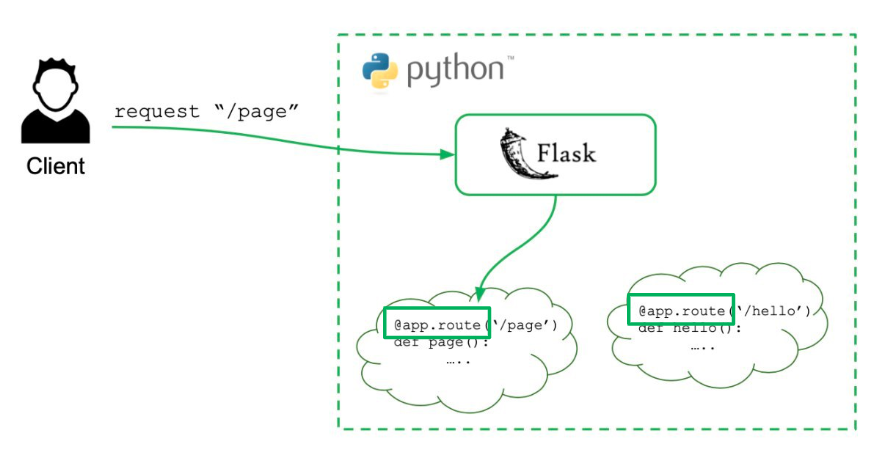

В случае с *Flask* маршрутизация выглядит как обычные функции *Python*, которые вы помечаете специальным **декоратором** `@app.route`. Он связывает эту функцию с адресом, на который приходит запрос. В этой функции вы должны разобрать **параметры запроса**, возможно, выполнить какую-то логику и вернуть ответ клиенту.

Таким образом, для написания минимально функционального сервера достаточно добавить в скрипт всего несколько строк: необходимые импорты, создание *Flask*-приложения, декоратор, который свяжет адрес (*endpoint*, **эндпоинт**) с функцией, и запуск приложения. Последнее как раз и запустит работу *Flask*: он будет слушать запросы, маршрутизировать их и возвращать ответ.
## <center>DJANGO
В отличие от *Flask*, *Django* нельзя назвать микрофреймворком. Напротив, даже минимальный проект для *Django* обычно генерируется **специальными скриптами** и включает с десяток файлов и папок.

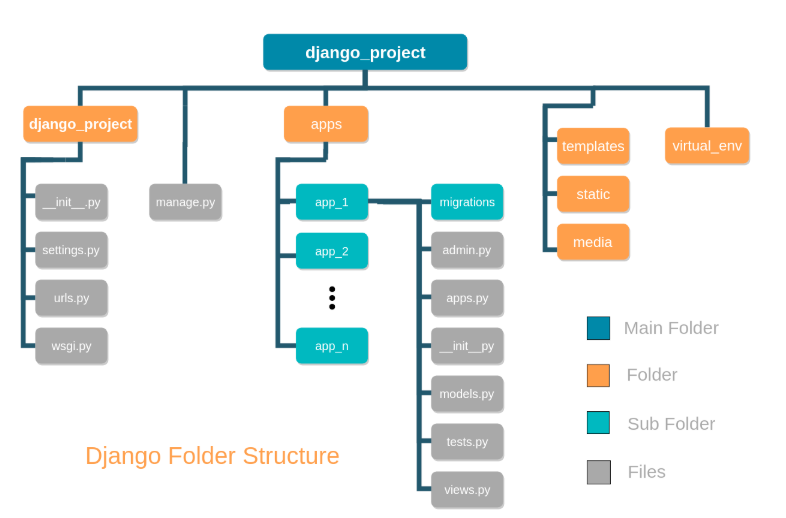

Такая сложная структура нужна для громоздких приложений, чтобы не путаться в коде. Поэтому Django используют, когда нужно что-то **посерьёзней**, например целые сайты с базами данных.

ПРЕИМУЩЕСТВА DJANGO:

* Мощный движок для рендера HTML-страниц, основанный на шаблонах.

* Собственный ORM.

* Огромное количество дополнительных плагинов. Один из них практически так же популярен, как и сам Django — речь о Django Rest Framework. Основываясь на ORM, он позволяет в несколько строк реализовывать эндпоинты протокола RESTful. Сам Django Rest Framework также имеет множество расширений. Благодаря этому написание сложного проекта можно свести к составлению правильной модели данных, установке и настройке подходящих расширений.

Стоит понимать, что, выбирая *Django*, вы оставляете проект со всей экосистемой *Django*, и что-то изменить впоследствии будет трудно. Выбирая *Flask*, вы получаете систему, построенную из блоков, каждый из которых проще заменить.

## <center>FastAPI
Это относительно молодой фреймворк, однако он уже успел завоевать некоторую популярность. Возможно, через некоторое время он превратится в стандарт индустрии, заменив *Flask*.

Основное нововведение в FastAPI — интеграция библиотеки pydantic, которая позволяет декларативно описывать структуры запросов.

Также в FastAPI есть **поддержка асинхронных функций** и реализация парадигмы *Dependency Injection*.

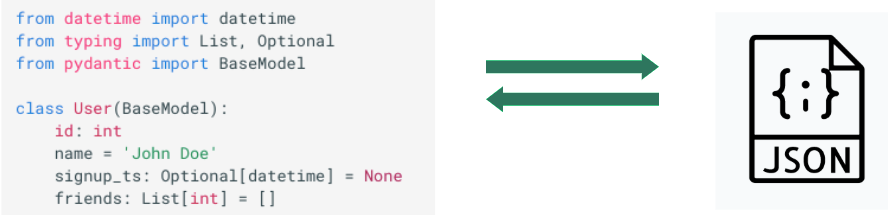

# <center>ДЕПЛОИМ МОДЕЛЬ НА ВЕБ-СЕРВИС
Нам необходимо написать веб-сервис, который позволит клиентам делать запросы к нашей модели. В ответ клиенты должны получать ответы — предсказания модели. Формат предсказаний обсудим ниже.

У модели, как всегда, есть метод `predict`, который принимает на вход numpy-массив размерности (кол-во объектов; кол-во признаков). Всего у нас четыре анонимных признака, и их интерпретация сейчас не имеет значения.